## Trabajo No. 3

### Sobre: Lógica borrosa
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

Para la solución del problema planteado, encontramos un Dataset público (https://www.kaggle.com/c/instacart-market-basket-analysis), este Dataset nos proporciona una amplia información sobre las compras de los productos para el hogar, productos para las mascotas entre otros productos. Con este Dataset se pretende extraer información que me permita deducir, si dos usuarios elegidos aleatoriamente, son similares o no, dependiendo de sus preferencias históricas de compras realizadas, en este caso en la plataforma de www.instacart.com

Cabe aclarar que también se pueden alquilar o comprar otros Dataset ya sea la preferencia o necesidad del problema

## Explicación Dataset
El Dataset que elegimos está compuesto por la siguiente información:
### 1. ailes.
Son los pasillos del supermercado en el cual se encuentra el producto, dentro de este encontramos un identificador único y el nombre del pasillo.
### 2. departments.
Este archivo son las clasificaciones de los productos, por ejemplo beberages, alcohol entre otros. En este podemos encontrar su identificador único y el nombre clasificatorio.
### 3. products.
Acá encontramos la información de los productos y esta se encuentra compuesta por el identificador único, nombre, en que pasillo se encuentra y como está clasificado el producto.
### 4. orders.
En esta encontraremos toda la información relacionada con las compras del usuario y está compuesta por el identificador único, el usuario, eval_set (nos dice si es anterior o actual la compra), número de la orden, hora de la compra y días desde la última compra.
### 5. order_products_prior & order_products_train.
Estos archivos son los que tienen la información combinada de las compras realizadas y está compuesta por el identificador de orders, el identificador del products, orden en que fue agregado al carrito de compras y si es primera vez en la compra de ese producto.
<hr/>

## Definición de características

A partir de la información del Dataset que ya definimos anteriormente, definimos algunas características para cada usuario que nos van a servir para realizar la comparación de similitud entre ellos. Vamos a ver entonces algunas características generales respecto al usuario.

<table width="100%">
    <tr>
        <th>Características personales</th>
        <th>Características situacionales</th>
        <th>Características de compras</th>
    </tr>
    <tr>
        <td>Sexo</td>
        <td>Fecha y Hora</td>
        <td>Clasificación/Categoría</td>
    </tr>
    <tr>
        <td>Edad</td>
        <td>Lugar o región</td>
        <td>Forma de pago</td>
    </tr>
    <tr>
        <td>Hobbies u ocupación</td>
        <td>--</td>
        <td>--</td>
    </tr>    
</table>

#### Nota:
Cabe aclarar que a pesar de definir acá las características personales y situacionales, no serán tenidas en cuenta para los conjuntos difusos de este problema; también que las características definidas para estos usuarios son deducidas, ya que en el Dataset no nos proporciona información suficiente del usuario para tener características mas concretas.

<hr/>

## Elemento de preferencia
Los elementos de preferencia se tomarán vectores de características, para nuestro caso las clasificaciones o categorías. <br/>
Las características que vamos a evaluar son las siguientes.
<ul>
    <li>Congelados (frozen)</li>
    <li>Panadería (bakery)</li>
    <li>Granos (bulk)</li>
    <li>Cuidado personal (personal care)</li>
    <li>Productos enlatados (cannet goods)</li>
    <li>Aseo (household)</li>
</ul>

Las características mencionadas son tanto para el usuario 1 como para el usuario 2.
<hr/>

## Conjuntos difusos de entrada
Acontinuación veremos los conjuntos difusos de entrada, a partir de cada una de las caracteristicas mencionadas anterirormente.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def fuzzy_defuzzy(Y, fuzzy_set_output, method="centroid"):
   
    if(method == "centroid"):
        val = np.sum(Y * fuzzy_set_output) /  np.sum(fuzzy_set_output)
    elif(method == "bisector"):
        x_prima = int(len(Y) / 2)
        
        epsilon = 0.05
                
        deltaY = (np.max(Y)-np.min(Y)) / len(Y)
                        
        Y_p = np.ones([len(Y)])*deltaY
                
        area1 = np.sum(Y_p[0:x_prima] * fuzzy_set_output[0:x_prima])
        area2 = np.sum(Y_p[x_prima:len(Y)] * fuzzy_set_output[x_prima:len(Y)])
                
        while(abs(area1 - area2) > epsilon):
            
            if(area1 > area2):
                x_prima = x_prima - 1
            else:
                x_prima = x_prima + 1
                
            area1 = np.sum(Y_p[0:x_prima] * fuzzy_set_output[0:x_prima])
            area2 = np.sum(Y_p[x_prima:len(Y)] * fuzzy_set_output[x_prima:len(Y)])
                    
        val = Y[x_prima]
                
    return val

def fuzzy_aggregation(fuzzy_sets):
    val = np.zeros([fuzzy_sets[0].shape[0]])
    
    for s in fuzzy_sets:
        val = np.maximum(val, s)
        
    return val

def fuzzy_implication(r, fuzzy_set):
    val = np.minimum(r, fuzzy_set)
    return val

def fuzzy_operator(operator, parameters):
    k = 0
    if(operator == "AND"):
        a = parameters["a"]
        b = parameters["b"]
        k = min(a, b)
    elif(operator == "OR"):
        a = parameters["a"]
        b = parameters["b"]
        k = max(a, b)
    elif(operator == "NOT"):
        a = parameters["a"]
        k = 1 - a
    else:
        print("Invalid operator.")
    
    return k

def fuzzify(x, fuzzy_sets):
    ##CODE HERE
    #f_x = []
    f_x = {} #lista de valores de pertenencia por cada conjunto difuso
    
    keys = fuzzy_sets.keys()
    
    for k in keys:
        #CODE HERE: utilizar la funcion membership(x, membership_function, parameters)
        #m = membership(x, fuzzy_sets[k]..., fuzzy_sets[k]...)
        m = membership(x, fuzzy_sets[k][0], fuzzy_sets[k][1])
        #f_x.append(k)
        f_x[k]=m
    
    return f_x

def generate_fuzzy_set(X, membership_function, parameters):
    fuzzy_set = np.array([membership(x, membership_function, parameters) for x in X])
    return fuzzy_set

def membership(x, membership_function, parameters):
    m_x = 0

    if(membership_function == "trapezoid"):
        a = float(parameters["a"])
        b = float(parameters["b"])
        c = float(parameters["c"])
        d = float(parameters["d"])

        if(x <= a or x >= d):
            m_x = 0
        elif(x >= a and x <= b):
            m_x = (x-a)/(b-a)
        elif(x > b and x < c):
            m_x = 1
        elif(x >= c and x < d):
            m_x = (d-x)/(d-c)

    elif(membership_function == "triangular"):
        a = float(parameters["a"])
        m = float(parameters["m"])
        b = float(parameters["b"])

        if(x <= a):
            m_x = 0
        elif(x > a and x <= m):
            m_x = (x-a)/(m-a)
        elif(x > m and x < b):
            m_x = (b-x)/(b-m)
        else:
            m_x = 0
    return m_x

In [19]:
def params_set(name_set):
    if (name_set == "frozen"):
        param = {"baja":{"a":0, "b":0, "c":5, "d":15},"media":{"a":5, "b":15, "c":25, "d":35},"alta":{"a":25, "b":35, "c":60, "d":100}}
    elif (name_set == "bakery"):
        param = {"baja":{"a":0, "b":0, "c":1, "d":2},"media":{"a":0,"b":0,"c":0,"d":0},"alta":{"a":1, "b":2, "c":3, "d":500}}
    elif (name_set == "bulk"):
        param = {"baja":{"a":0, "b":0, "c":10, "d":20},"media":{"a":10, "b":15, "c":30, "d":35},"alta":{"a":25, "b":35, "c":50, "d":51}}
    elif (name_set == "personal care"):
        param = {"baja":{"a":0, "b":0, "c":1, "d":2},"media":{"a":0,"b":0,"c":0,"d":0},"alta":{"a":1, "b":2, "c":5, "d":6}}
    elif (name_set == "cannet goods" or name_set == "household"):
        param = {"baja":{"a":0, "b":0, "c":4, "d":6},"media":{"a":4, "b":7, "c":8, "d":10},"alta":{"a":8, "b":11, "c":15, "d":16}}
        
    return param        

Categoría de Congelados (frozen)


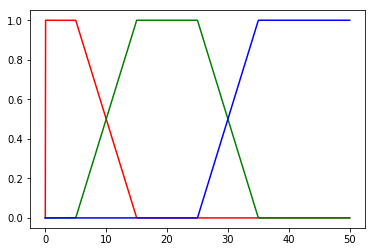

Categoría de Panaderia (bakery)


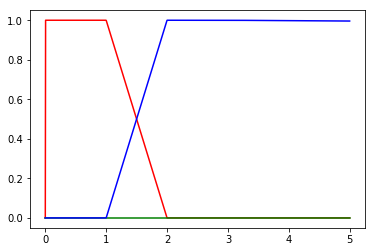

Categoría de Granos (bulk)


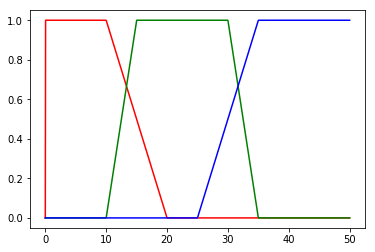

Categoría de Cuidado Personal (personal care)


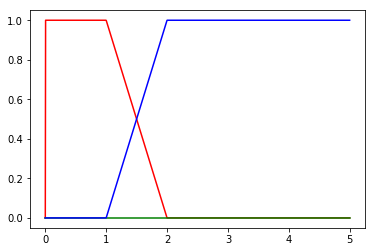

Productos enlatados (cannet goods)


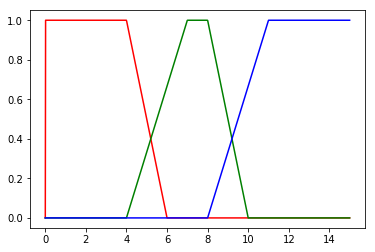

Aseo (household)


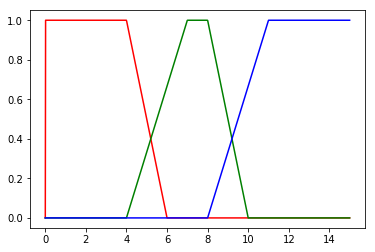

In [20]:
categories = ["frozen","bakery","bulk","personal care","cannet goods","household"]
resolucion = 1000
for name in categories:
    if (name == "frozen"):
        print 'Categoría de Congelados (frozen)'
        numLinspace = 50        
    elif (name == "bakery"):
        print 'Categoría de Panaderia (bakery)'
        numLinspace = 5
    elif (name == "bulk"):
        print 'Categoría de Granos (bulk)'
        numLinspace = 50
    elif (name == "personal care"):
        print 'Categoría de Cuidado Personal (personal care)'
        numLinspace = 5
    elif (name == "cannet goods"):
        print 'Productos enlatados (cannet goods)'
        numLinspace = 15
    elif (name == "household"):
        print 'Aseo (household)'
        numLinspace = 15
        
    
    T = np.linspace(0, numLinspace, resolucion)

    conjunto_baja = generate_fuzzy_set(T, "trapezoid", params_set(name)["baja"])
    conjunto_media = generate_fuzzy_set(T, "trapezoid", params_set(name)["media"])
    conjunto_alta = generate_fuzzy_set(T, "trapezoid", params_set(name)["alta"])

    plt.plot(T,conjunto_baja, 'r')
    plt.plot(T,conjunto_media, 'g')
    plt.plot(T,conjunto_alta, 'b')
    plt.show()

## Conjuntos difusos de salida
El conjunto de difuso de salida es la caracteristica de similitud, la cual me indica que porcentaje de silitud tienen dos usuarios, <br> la cual seria:


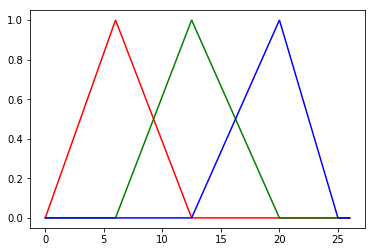

In [4]:
T = np.linspace(0, 26, resolucion)

params_bajo = {"a":0, "m":6, "b":12.5}
params_medio = {"a":6, "m":12.5, "b":20}
params_alto = {"a":12.5, "m":20, "b":25}

conjunto_baja = generate_fuzzy_set(T, "triangular", params_bajo)
conjunto_media = generate_fuzzy_set(T, "triangular", params_medio)
conjunto_alta = generate_fuzzy_set(T, "triangular", params_alto)

plt.plot(T,conjunto_baja, 'r')
plt.plot(T,conjunto_media, 'g')
plt.plot(T,conjunto_alta, 'b')
plt.show()

## Reglas
Para realizar la definicion de las reglas tomamos la diferencia del vector de entrada para el Usuario1 y el Usuario2, quedando asi las siguientes reglas:

<ol>    
    <li>if (difMedia == 0 && difBajas == 0) entonces 1(similares)</li>
    <li>else if (difMedia == 0 && difAltas == 0) entonces 1(similares)</li>
    <li>if (difBajas == 0 || difAltas == 0) entonces 1(similares)</li>
    <li>else 0(diferentes)</li>
</ol>

## Simulación de la solución diseñada

In [5]:
#1. Inicializar parametros

U1_frozzen_baja = "baja"
U1_frozzen_media = "media"
U1_frozzen_alta = "alta"
funcion_u1_frozzen_baja = "trapezoid"
funcion_u1_frozzen_media = "trapezoid"
funcion_u1_frozzen_alta = "trapezoid"
params_u1_baja = params_set("frozen")["baja"]
params_u1_media = params_set("frozen")["media"]
params_u1_alta = params_set("frozen")["alta"]

U2_frozzen_baja = "baja"
U2_frozzen_media = "media"
U2_frozzen_alta = "alta"
funcion_u2_frozzen_baja = "trapezoid"
funcion_u2_frozzen_media = "trapezoid"
funcion_u2_frozzen_alta = "trapezoid"
params_u2_baja = params_set("frozen")["baja"]
params_u2_media = params_set("frozen")["media"]
params_u2_alta = params_set("frozen")["alta"]

U1_bulk_baja = "baja"
U1_bulk_media = "media"
U1_bulk_alta = "alta"
funcion_u1_bulk_baja = "trapezoid"
funcion_u1_bulk_media = "trapezoid"
funcion_u1_bulk_alta = "trapezoid"
params_u1_bulk_baja = params_set("bulk")["baja"]
params_u1_bulk_media = params_set("bulk")["media"]
params_u1_bulk_alta = params_set("bulk")["alta"]

U2_bulk_baja = "baja"
U2_bulk_media = "media"
U2_bulk_alta = "alta"
funcion_u2_bulk_baja = "trapezoid"
funcion_u2_bulk_media = "trapezoid"
funcion_u2_bulk_alta = "trapezoid"
params_u2_bulk_baja = params_set("bulk")["baja"]
params_u2_bulk_media = params_set("bulk")["media"]
params_u2_bulk_alta = params_set("bulk")["alta"]


similar_bajo = "baja"
similar_medio = "media"
similar_alto = "alta"
funcion_similar_bajo = "triangular"
funcion_similar_medio = "triangular"
funcion_similar_alto = "triangular"
params_bajo = {"a":0, "m":6, "b":12.5}
params_medio = {"a":6, "m":12.5, "b":20}
params_alto = {"a":12.5, "m":20, "b":25}

In [12]:
#2 fusificar

U1quantityCategoryFrozen = 30
U2quantityCategoryFrozen = 20

U1fuzzy_sets_frozen = {U1_frozzen_baja:(funcion_u1_frozzen_baja, params_u1_baja), U1_frozzen_media:(funcion_u1_frozzen_media, params_u1_media), U1_frozzen_alta:(funcion_u1_frozzen_alta, params_u1_alta)}
U1Frozen_fuzzy = fuzzify(U1quantityCategoryFrozen, U1fuzzy_sets_frozen)
     
U2fuzzy_sets_frozen = {U2_frozzen_baja:(funcion_u2_frozzen_baja, params_u2_baja), U2_frozzen_media:(funcion_u2_frozzen_media, params_u2_media), U2_frozzen_alta:(funcion_u2_frozzen_alta, params_u2_alta)}
U2Frozen_fuzzy = fuzzify(U2quantityCategoryFrozen, U2fuzzy_sets_frozen)

print("Usuario 1: ", U1Frozen_fuzzy)
print("Usuario 2: ",U2Frozen_fuzzy)

('Usuario 1: ', {'baja': 0, 'media': 0.5, 'alta': 0.5})
('Usuario 2: ', {'baja': 0, 'media': 1, 'alta': 0})


In [13]:
#3. Resolver reglas

regla_1 = fuzzy_operator("OR", {"a":U1Frozen_fuzzy["baja"], "b":U2Frozen_fuzzy["baja"]})
regla_2 = fuzzy_operator("OR", {"a":U1Frozen_fuzzy["media"], "b":U2Frozen_fuzzy["media"]})
regla_3 = fuzzy_operator("OR", {"a":U1Frozen_fuzzy["alta"], "b":U2Frozen_fuzzy["alta"]})

print(regla_1,regla_2,regla_3)

(0, 1, 0.5)


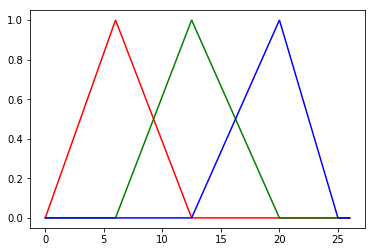

In [14]:
#4. Implicacion 
T = np.linspace(0,26, 1000)
fuzzy_set_sBajo = generate_fuzzy_set(T, funcion_similar_bajo, params_bajo)
fuzzy_set_sMedio = generate_fuzzy_set(T, funcion_similar_medio, params_medio)
fuzzy_set_sAlto = generate_fuzzy_set(T, funcion_similar_alto, params_alto)

plt.plot(T, fuzzy_set_sBajo, 'r')
plt.plot(T, fuzzy_set_sMedio, 'g')
plt.plot(T, fuzzy_set_sAlto, 'b')
plt.show()

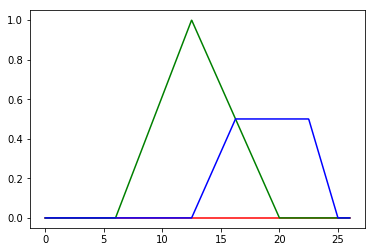

In [15]:
fs_sBajo_truncated = fuzzy_implication(regla_1, fuzzy_set_sBajo)
fs_sMedio_truncated= fuzzy_implication(regla_2, fuzzy_set_sMedio)
fs_sAlto_truncated = fuzzy_implication(regla_3, fuzzy_set_sAlto)

plt.plot(T, fs_sBajo_truncated, 'r')
plt.plot(T, fs_sMedio_truncated, 'g')
plt.plot(T, fs_sAlto_truncated, 'b')
plt.show()

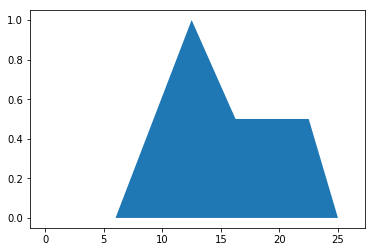

In [16]:
#5. Agregacion
aggregated_tip = fuzzy_aggregation([fs_sBajo_truncated, fs_sMedio_truncated, fs_sAlto_truncated])
plt.fill(T, aggregated_tip)
plt.show()

In [17]:
#6. desfusificar
salida = fuzzy_defuzzy(T, aggregated_tip, "bisector")
print(salida)

14.392392392392392


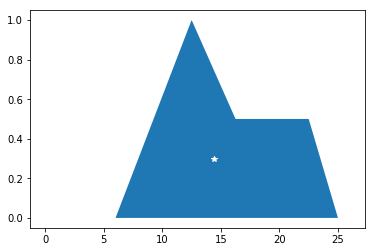

In [18]:
aggregated_tip = fuzzy_aggregation([fs_sBajo_truncated, fs_sMedio_truncated, fs_sAlto_truncated])
plt.fill(T, aggregated_tip)
plt.plot(salida, 0.3, 'w*')
plt.show()